<h1>Soundscape Analysis by Shift-Invariant Latent Components</h1>
<h2>Michael Casey - Bregman Labs, Dartmouth College</h2>

This workbook demonstrates the use of matrix factorization to decompose spectrograms into independent streams of sound objects. We use shift-invariant probabilistic latent component analysis (SIPLCA) for factorizing a time-frequency matrix (2D array) into a convolution of 2D kernels (patches) with sparse activation functions. 

The methods are based on the following:

1. Smaragdis, P, B. Raj, and M.V. Shashanka, 2008. [Sparse and shift-invariant feature extraction from non-negative data](http://paris.cs.illinois.edu/pubs/smaragdis-icassp2008.pdf). In proceedings IEEE International Conference on Audio and Speech Signal Processing, Las Vegas, Nevada, USA.
    
2. Smaragdis, P. and Raj, B. 2007. [Shift-Invariant Probabilistic Latent Component Analysis, tech report](http://paris.cs.illinois.edu/pubs/plca-report.pdf), MERL technical report, Camrbidge, MA.

<h2>Requirements</h2>
To run this workbook you will need: Numpy, Matlplotlib, the [Bregman Audio Toolkit](http://github.com/bregmanstudio/BregmanToolkit), and the [Bregman SoundscapeEcology Toolkit](http://github.com/bregmanstudio/SoundscapeEcology).
    

In [1]:
from pylab import * # numpy, matplotlib, plt
from bregman.suite import * # Bregman audio feature extraction library
from soundscapeecology import * # 2D time-frequency shift-invariant convolutive matrix factorization
%matplotlib inline
rcParams['figure.figsize'] = (15.0, 9.0)

<h2>Example audio</h2>
Load an example audio file from the 'sounds' directory, 44.1kHz, stereo, 60 seconds duration.

In [2]:
sound_path = 'sounds'
sounds = os.listdir(sound_path)
print "sounds:", sounds

sounds: ['KW_duskAnuran.wav']


<h2>Spectrum Analysis Parameters</h2>
Inspect the soundfile by loading it (using wavread) and printing some useful parameters.
A window size of 4096 with a hop of 1024 translates to 92ms and 23ms respectively for an audio samplerate of 44100Hz

In [3]:
N=4096; H=N/4
x,sr,fmt = wavread(os.path.join(sound_path,sounds[0]))
print "sample_rate:", sr, "(Hz), fft size:", (1000*N)/sr, "(ms), hop size:", (1000*H)/sr, "(ms)"

sample_rate: 44100 (Hz), fft size: 92 (ms), hop size: 23 (ms)


<h2>SoundscapeEcology Toolkit</h2>
    Analyze species-specific patterns in environmental recordings

    SoundscapeEcology methods:
            load_audio()   - load sample of a soundscape recording
            sample_audio_dir() - load group sample from multiple recordings
            analyze()      - extract per-species?? time-frequency partitioning from loaded audio
            visualize()    - show component spectrograms 
            resynthesize() - sonify summary statistics information
            model_fit_resynhesize() - generative statistical model of time-shift kernels
            summarize()    - show soundscape ecology entropy statistics
            
    SoundscapeEcology static methods:
            batch_analyze() - multiple analyses for a list of recordings
            entropy() - compute entropy (in nats) of an acoustic feature distribution
            gen_test_data() - generate an artificial soundscape for testing

    Workflows:
         [load_audio(), sample_audio_dir()] -> analyze() -> [visualize(), resynthesize(), summarize()]

In the following example we will:
1. Instantiate a new SoundscapeEcololgy object
2. load_audio() and sample segments of it without replacement
3. analyze() into 16 shift-invariant kernels 
4. visualize() - visualize the spectrum reconstruction and the individual components
5. resynthesize() - sonify the spectrum reconstruction and the individual components


In [4]:
# 1. Instantiate a new SoundscapeEcololgy object using the spectral analysis parameters defined above
S = SoundscapeEcology(nfft=N, wfft=N/2, nhop=H)
# Inspect the contents of this object
print S.__dict__


{'extractor': <class 'bregman.features.LogFrequencySpectrum'>, 'stereo': False, 'plt_args': {'normalize': 1, 'vmax': 0.0, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0xb0f2ce0c>, 'vmin': -45, 'dbscale': 1}, 'verbose': 1, 'sr': None, 'is_complex': False, 'channels': None, 'sample_points': None, 'frames_per_sample': None, 'n_components': None, 'num_samples': None, 'file_list': [], 'x': [], 'sample_dur': None, 'feature_params': {'hi': 16000, 'verbosity': 0, 'nfft': 4096, 'power_ext': '.power', 'intensify': False, 'nbpo': 12, 'lcoef': 1, 'ncoef': 10, 'lo': 31.25, 'onsets': False, 'feature': 'cqft', 'nhop': 1024, 'window': 'hann', 'magnitude': True, 'sample_rate': 44100, 'log10': False, 'wfft': 2048}, 'features': None}


In [5]:
# 2. load_audio() - sample segments of the soundfile without replacement, to speed up analysis
# The computational complexity of the analysis is high, and the information in a soundscape is largely redundant
# So, draw 15 random segments in time order, each consisting of 10 STFT frames of audio data

S.load_audio(os.path.join(sound_path,sounds[0]), num_samples=15, frames_per_sample=10) # num_samples=None means analyze the whole sound file


Loading file sounds/KW_duskAnuran.wav , duration=60.00s


In [6]:
# 3. analyze() into 16 shift-invariant kernels 
# The STFT spectrum will be converted to a constant-Q transform by averaging over logarithmically spaced bins
# The shift-invariant kernels will have shift and time-extent dimensions
# The default kernel shape yields 1-octave of shift (self.feature_params['nbpo']), 
# and its duration is frames_per_sample. Here, the num_components and win parameters are illustrated.

S.analyze(num_components=16, win=(S.feature_params['nbpo'], S.frames_per_sample))


Extracting cqft, nfft=4096, wfft=2048, nhop=1024
Extracing SIPLCA2, num_components=16, win=(12,10)
Inverting 16 extracted components


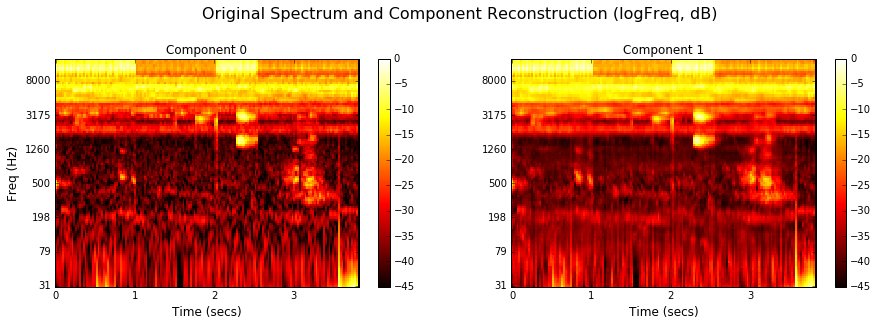

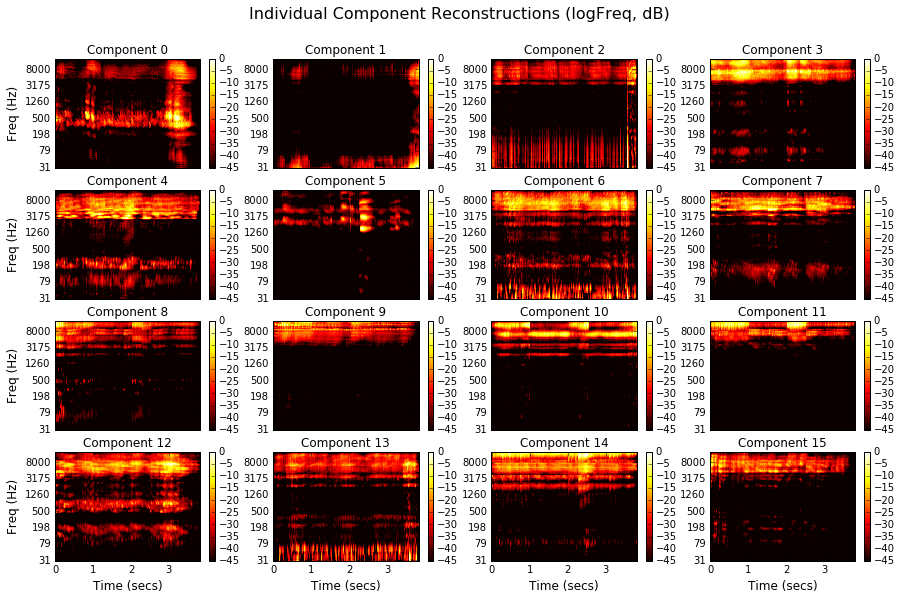

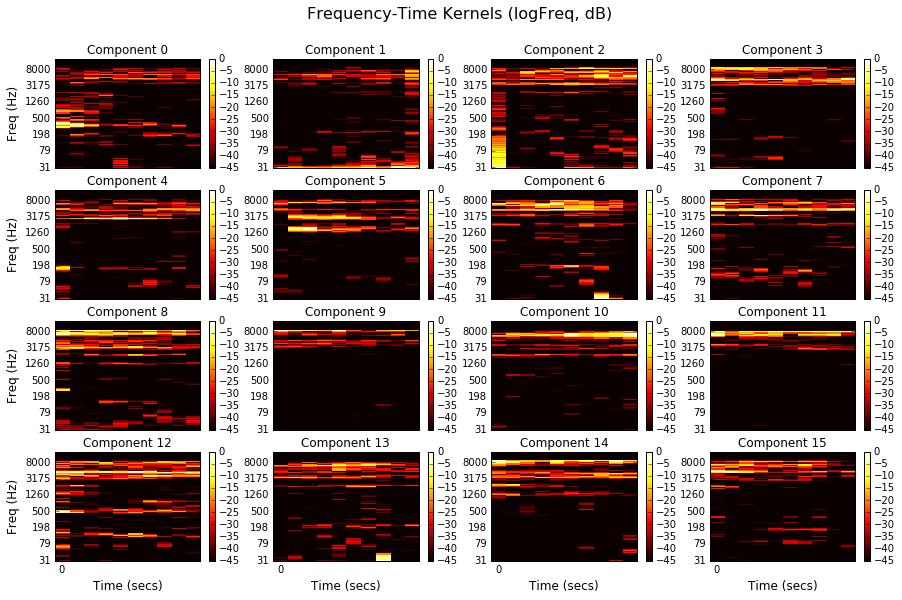

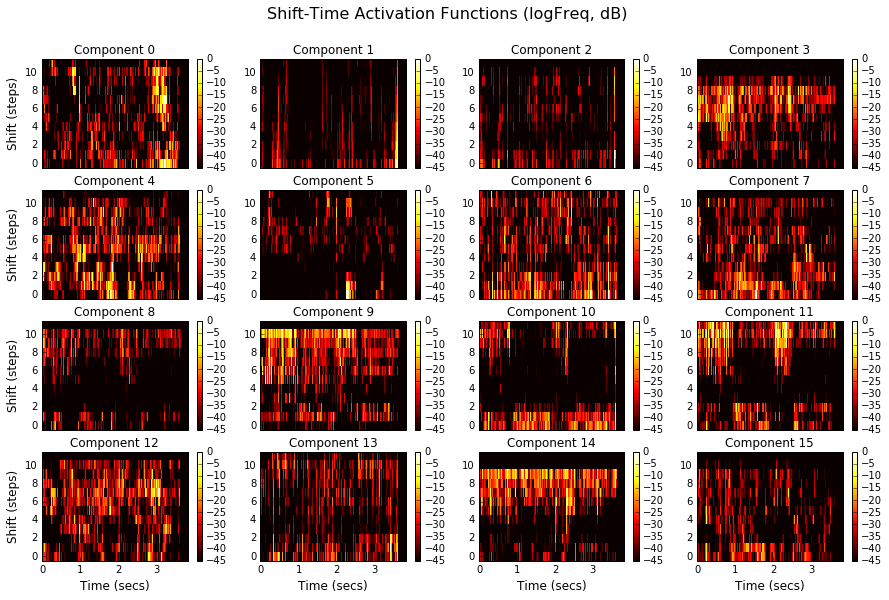

In [7]:
# 4. visualize() - visualize the spectrum reconstruction and the individual components
# inputs:
#    plotXi - visualize individual reconstructed component spectra [True]
#    plotX - visualize original (pre-analysis) spectrum and reconstruction [False]
#    plotW - visualize component time-frequency kernels [False]
#    plotH - visualize component shift-time activation functions [False]
#    **pargs - plotting key word arguments [**self.plt_args]

S.visualize(plotX=True, plotXi=True, plotW=True, plotH=True)


In [8]:
# 5. resynthesize() - sonify the results
# First, listen to the original (inverse STFT) and the full component reconstruction (inverse CQFT with random phases)
x_orig = S.F.inverse(S.X)
x_recon = S.F.inverse(S.X_hat, Phi_hat=(np.random.rand(*S.F.STFT.shape)*2-1)*np.pi) # random phase reconstruction
play(balance_signal(x_orig))
play(balance_signal(x_recon))

Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050


In [11]:
# First, listen to the original (inverse STFT) and the full component reconstruction (inverse CQFT with random phases)
# Second, listen to the individual component reconstructions
# Use the notebook's "interrupt kernel" button (stop button) if this is too long (16 x audio sequence)
# See above plots for the individual component spectrograms

for k in range(S.n_components):
    x_hat = S.resynthesize(k) # resynthesize individual component
    play(balance_signal(x_hat)) # play it back

 Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
Period size is 64 , Buffer size is 22050
